# Вежба 4: Имплементација на линеарна регресија со scikit-learn

In [1]:
import pandas as pd

print(pd.__version__)

1.4.2


Нашиот регресиски проблем ќе биде предвидување на цената на автомобилите. Податоците се одвоени со запирка и ќе користиме python engine за вчитување во pandas dataframe. Податоците имаат повеќе од 20 колони (особини) за повеќе од 200 возила (редови). Некои од особините се: типот на гориво, должина на возилото, производител, итн.

In [2]:
auto_data = pd.read_csv('..\Exercises 5 - Datasets\imports-85.data', sep=r'\s*,\s*', engine='python')
auto_data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


# PREPROCESSING

Забележете дека вредностите кои недостасуваат се означени со ?. Тие вредност ќе ги замениме со NaN (Not a Number) вредности за да можеме да користиме функции кои лесно работат со NaN вредности

In [4]:
import numpy as np

auto_data = auto_data.replace('?', np.nan)
auto_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


describe() функцијата го опишува целото податочно множество со број, средна вредност, стандардна девијација, минимална и максимална вредност, како и вредности за одреден перцентил

In [5]:
auto_data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


За добиеме статистика и за зависната променлива (price) го користиме параметарот include='all'

In [6]:
auto_data.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164,205,205,205,203,205,205,205,205.000000,...,205.000000,205,201,201,205.000000,203,203,205.000000,205.000000,201
unique,NaN,51,22,2,2,2,5,3,2,NaN,...,NaN,8,38,36,NaN,59,23,NaN,NaN,186
top,NaN,161,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.4,NaN,68,5500,NaN,NaN,8921
freq,NaN,11,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,2
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


Ако ја опишеме само колоната price ќе видиме дека е од тип објект и тој не може да биде сумаризиран со нумеричка статистика

In [7]:
auto_data['price'].describe()

count      201
unique     186
top       8921
freq         2
Name: price, dtype: object

## object -> to_numeric

Па затоа типот на оваа колона го конвертираме во децимална вредност со користење на to_numeric методот. Притоа со errors='coerce' ги игнорираме грешките. По конверзијата ја прегледуваме колоната price која сега е тип float64

In [9]:
auto_data['price'] = pd.to_numeric(auto_data['price'], errors='coerce')
auto_data['price'].describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

Доколку некои променливи сметаме дека не се битни во предвидувањето на цената, истите може лесно да ги отстраниме со помош на методот drop(). Пример е normalized-losses која ја дава вредноста на загубата при исплата на осигурување, која не дава информација за цената на возилото

In [10]:
auto_data = auto_data.drop('normalized-losses', axis=1)
auto_data.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450.0


Повторно правиме преглед на табуларните податоци

In [11]:
auto_data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220,13207.129353
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


Промелнивата horsepower ја претвораме во децимална вредност

In [12]:
auto_data['horsepower'] = pd.to_numeric(auto_data['horsepower'], errors='coerce')
auto_data['horsepower'].describe()

count    203.000000
mean     104.256158
std       39.714369
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64

num-of-cylinders е категорична променлива, па затоа со помош на речникот cylinder_dict ја претвораме во нумеричка променлива. Ова не енкодирање туку само доделивање на нумеричка вредност со користење на помошен речник (dictionary)

In [13]:
auto_data['num-of-cylinders'].describe()

count      205
unique       7
top       four
freq       159
Name: num-of-cylinders, dtype: object

In [14]:
cylinder_dict = {'two': 2,
                 'three': 3,
                 'four': 4,
                 'five': 5,
                 'six': 6,
                 'eight': 8,
                 'twelve': 12}

auto_data['num-of-cylinders'].replace(cylinder_dict, inplace=True)
auto_data.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.4,10.0,102.0,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.4,8.0,115.0,5500,18,22,17450.0


## One Hot Encoding

Ако ги погледнеме повторно податоците, ќе забележиме мноштво на категорични променливи кои ги заменуваме со нумерички на следниов начин (види Вежба 2)

In [15]:
auto_data = pd.get_dummies(auto_data,
                           columns=['make',
                                    'fuel-type',
                                    'aspiration',
                                    'num-of-doors',
                                    'body-style',
                                    'drive-wheels',
                                    'engine-location',
                                    'engine-type',
                                    'fuel-system'])
auto_data.head()

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,...,1,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.4,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.4,...,0,0,0,0,0,0,0,1,0,0


## Remove NaN's

Ги чистиме податоците со тоа што ги отстрануваме редовите кои имаа барем една NaN вредност. Со тоа бројот на возила (редови) од 205 се намали на 195

In [16]:
auto_data = auto_data.dropna()
auto_data

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,...,1,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.4,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.4,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,4,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
201,-1,109.1,188.8,68.8,55.5,3049,4,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
202,-1,109.1,188.8,68.9,55.5,3012,6,173,3.58,2.87,...,1,0,0,0,0,0,0,1,0,0
203,-1,109.1,188.8,68.9,55.5,3217,6,145,3.01,3.4,...,0,0,0,0,0,1,0,0,0,0


Сега проверуваме дали имаме null вредности. Гледаме дека податоците не содржат null вредности

In [18]:
auto_data[auto_data.isnull().any(axis=1)]

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi


# Split data to train and test

Откако ги предпроцесиравме податоците сега сме спремни да ги користиме истите за да го истренираме нашиот модел
Методот train_test_split() ни овозможува лесен начин да ги поделиме податоците на тренинг и тест множество. Тренинг множеството се користи за да се истренира моделот, додека пак, тест множеството за да се евалуира истиот
Во X ги ставаме само зависните променливи (причината), тоа се сите променливи освен price
Во Y ја ставаме зависната променлива (ефектот, лабелата), тоа е променливата price.
Во нашиот пример 20% од податоците ќе бидат искористени за тестирање на моделот, а 80% за тренирање на истиот

In [19]:
from sklearn.model_selection import train_test_split

X = auto_data.drop('price', axis=1)

#taking the labels (price)
Y = auto_data['price']

#spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# LINEAR REGRESSION

За да го истренираме линеарниот регресиски модел потребно е да истанцираме објект од класата LineraRegression.
Со ова веќе имаме естиматор на кој го повикуваме fit() методот со тренинг множеството (X и Y)
X променливите ќе бидат ископирани и нема да бидат пребришани од естиматор во фазата на тренирање
fit_intercept=True - кажува дека регресиската линија ќе го има и коефициентот А, односно дека податоците не се нормализирани и правата нема да минува низ координатниот почеток.
normalize=False - нема да извршиме нормализација на податоците, процес сличен на стандардизација (види Вежба 1) каде се одзема средната вредност и се дели со L2 нормата (наместо со стандрадната девијација)

In [20]:
from sklearn.linear_model import LinearRegression

linearModel = LinearRegression()
linearModel.fit(X_train, Y_train)

LinearRegression()

Ја добиваме R2 вредноста (која е доста висока, блиску до 0.97) и кажува дека моделот опфаќа голем дел од варијансата на нашето тренинг множество

In [21]:
linearModel.score(X_train, Y_train)

0.967922737092433

Можеме да ги видиме коефициентите на линеарната регресија

In [22]:
linearModel.coef_

array([-5.80061464e+02,  3.06874682e+02, -1.06499194e+02,  1.52236727e+02,
       -5.05771408e+02,  5.30902624e+00, -4.15988710e+03,  2.82885047e+02,
       -1.75044342e+04, -4.49860407e+03, -1.59555122e+03, -4.82296063e+01,
        2.15673623e+00, -6.79852969e+01,  1.73362582e+02, -3.74284422e+03,
        3.71721668e+03,  6.86565908e+03, -4.12474818e+03, -4.48093478e+03,
       -2.94555422e+02, -4.74283895e+03,  3.47319261e+03, -4.08732786e+02,
        3.02841192e+03,  2.30284405e+03, -4.71448781e+03, -6.67651176e+02,
       -8.40276958e+03, -5.25933085e+03,  1.04713265e+04,  1.81898940e-11,
        8.36042927e+03, -4.81543507e+02, -2.06062392e+03,  6.21153583e+01,
        1.09986569e+03,  6.06615966e+03, -6.06615966e+03, -1.38232301e+03,
        1.38232301e+03,  3.37569880e+03,  3.28229109e+03,  2.99875643e+03,
       -1.00643481e+03, -1.20820627e+03, -3.92414032e+02, -3.91701310e+02,
       -4.99487338e+02, -6.59140532e+02,  1.15862787e+03, -2.46748485e+03,
        2.46748485e+03, -

За да ги поврземе коефициентите со соодветните променливи користиме pd.Series() а со сортирање на вредностите можеме да ја видиме тежината е дадена на соодветната променлива од страна на крајниот линеарен регресиски модел.
Негативните вредности (корелации) кажуваат дека овие променливи ја намалуваат цената на автомобилот, додека пак, позитивните дека ја зголемуваат истата. Па така, porche, mercedes-benz се скапи автомобили за разлика од plymouth, mitsubishi и toyota.
Вредностите коие се блиски до 0, укажуваат дека соодветните променливи воопшто не влијаат на цената на автомобилот

In [23]:
predictors = X_train.columns
coef = pd.Series(linearModel.coef_, predictors).sort_values()
print(coef)

bore               -17504.434184
make_peugot         -8402.769583
fuel-type_gas       -6066.159660
make_plymouth       -5259.330848
make_isuzu          -4742.838945
                        ...     
fuel-system_idi      6066.159660
fuel-type_diesel     6066.159660
make_bmw             6865.659076
make_saab            8360.429269
make_porsche        10471.326516
Length: 68, dtype: float64


Сега ќе го користиме тренираниот модел за го тестираме користејќи го тест множеството. Предвидените цени ќе ги чуваме во y_predict променливата

In [24]:
y_predict = linearModel.predict(x_test)

In [25]:
y_predict

array([10057.07293877, 24826.86025793,  8257.54623336,  5756.02432516,
       18123.77811725,  8138.40447534,  9913.46711717, 36088.00375719,
        7066.96620474,  5208.7703284 , 21334.71091108, 18624.83213057,
       15844.98725665, 11548.5664369 , 20777.75004026, 15822.56527453,
       15510.51860376, 30546.3875583 , 47090.26954491,  7193.59605919,
        5692.87553369,  9187.20691827,  8914.45743491,  6296.59792394,
       32686.93260339, 10944.44678673, 17923.24055465, 10169.90685647,
        9296.54170626, 47090.26954491, 10588.87591872,  8960.30194416,
       47471.52613526,  8991.83493211, 20025.47702691, 10609.43591573,
        7705.18489163, 18171.56624823, 11564.52197795])

За да ги споредиме визуелно ќе ја користиме matplotlib библиотеката. Предвидените вредности се означени со сина боја, додека пак, актуелните вредности на цената се означени со портокалова боја

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


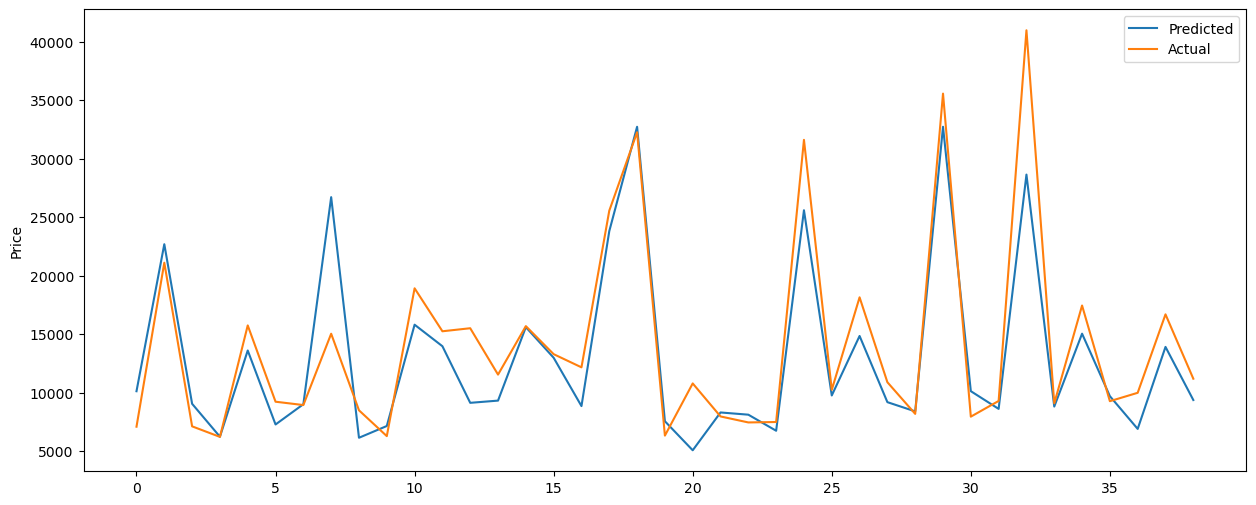

In [64]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('Price')
plt.legend()
plt.show()

За да видиме колку добро предвидува нашиот модел врз тест множеството ја користиме R2 вредноста, која сега изнесува околу 0.63 и е значително помала од тренинг множеството

In [27]:
r_square = linearModel.score(x_test, y_test)
r_square

0.6322583416123835

Можеме да го пресметаме и MSE за тест множеството

In [28]:
from sklearn.metrics import mean_squared_error

linear_model_mse = mean_squared_error(y_predict, y_test)
linear_model_mse

26099937.604292464

Уште подобра метрика е RMSE (која е квадратен корен од MSE). Ова ни кажува дека предвидената цена е за околу 5109 долари поразлична од актуелната цена (помала или поголема)

In [29]:
import math

math.sqrt(linear_model_mse)

5108.809803104091

# LASSO

Ја инстанцираме Lasso класата и како параметар го даваме alpha хиперпараметарот за да се спречи Overfitting. Тука одлучуваме да го нормализираме податоците, односно од податоците ја одземаме средната вредност и потоа разликата ја делиме со L2 нормата

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.fit_transform(x_test)

lasso_model = Lasso(alpha=.5)
lasso_model.fit(X_train_scaled, Y_train)

C:\Users\dimit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.390e+07, tolerance: 9.783e+05
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.5)

Гледаме помала вредност за R2 за разлика од едноставната MSE регресија

In [44]:
lasso_model.score(X_train_scaled, Y_train)

0.9678888842568585

Ги печатиме коефициентите од каде може да се види дека голем број од коефициентите имаат вредност 0, односно поради нивната комплексност биле пенализирани од Lasso

In [45]:
coef = pd.Series(lasso_model.coef_, predictors).sort_values()
print(coef)

compression-ratio    -5927.468845
bore                 -4529.365181
num-of-cylinders     -3975.400017
make_peugot          -1790.166813
horsepower           -1667.371472
                         ...     
make_porsche          1695.471314
wheel-base            1756.652107
curb-weight           2605.059235
fuel-type_diesel      5245.095760
engine-size          10743.740081
Length: 68, dtype: float64


In [46]:
y_predict = lasso_model.predict(x_test_scaled)

Од сликата може да се види дека предвидените вредноси за тест множеството се многу поблиску до актуелни во споредба со актуелните вредности

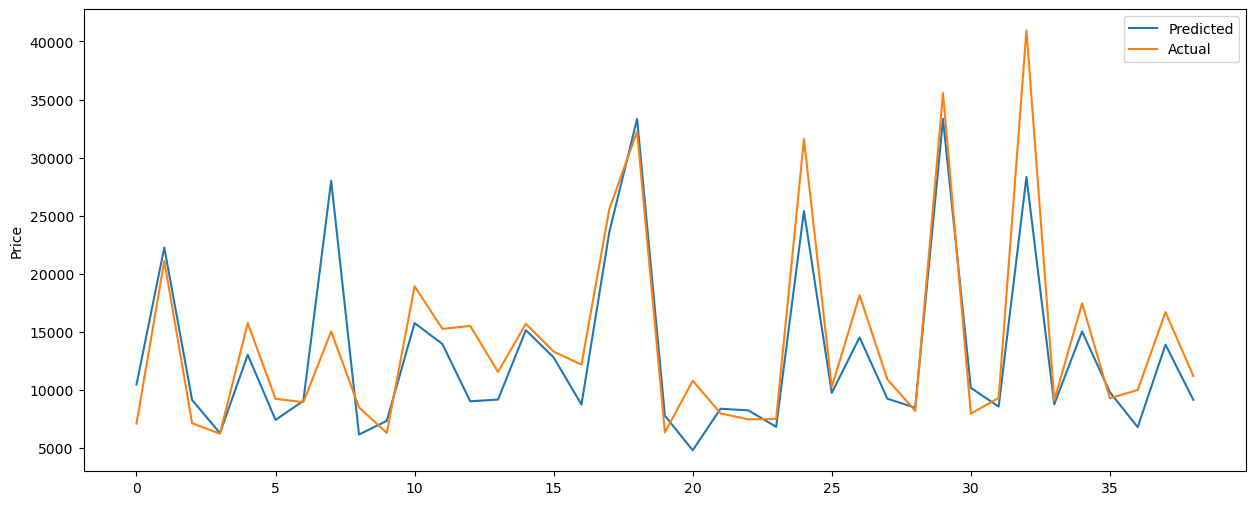

In [47]:
from matplotlib import pylab

pylab.rcParams['figure.figsize'] = (15, 6)
plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('Price')

plt.legend()
plt.show()

Забележувате дека го намаливме overfitting, со тоа што добивме помал R2 за тест множеството

In [48]:
r_square = lasso_model.score(x_test_scaled, y_test)
r_square

0.7937508229111787

За разлика од линеарниот модел со Lasso правиме скоро двојно помала грешка во предвидената цена

In [49]:
lasso_model_mse = mean_squared_error(y_predict, y_test)
math.sqrt(lasso_model_mse)

3825.995295159566

# RIDGE

**Самостојна работа**: Пробајте да ја промените вредноста на alpha да биде 5 и обидете се сами да извлечете заклучоци. Дали overfitting-от ќе биде намален?
За да ја добиете вредноста на alpha со која ќе добиете најдобар модел се користи Grid Search (ова ќе биде разгледано понатаму во курсот)

In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.fit_transform(x_test)

ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train_scaled, Y_train)

Ridge(alpha=1)

In [86]:
ridge_model.score(X_train_scaled, Y_train)

0.9631396308553767

In [87]:
coef = pd.Series(ridge_model.coef_, predictors).sort_values()
print(coef)

compression-ratio   -1480.044262
make_peugot         -1463.317214
bore                -1233.914059
engine-type_ohcv    -1097.991785
length              -1038.332795
                        ...     
engine-type_l        1194.970855
wheel-base           1310.401832
make_bmw             1400.060524
curb-weight          1938.659537
engine-size          4962.052930
Length: 68, dtype: float64


In [88]:
y_predict = ridge_model.predict(x_test_scaled)

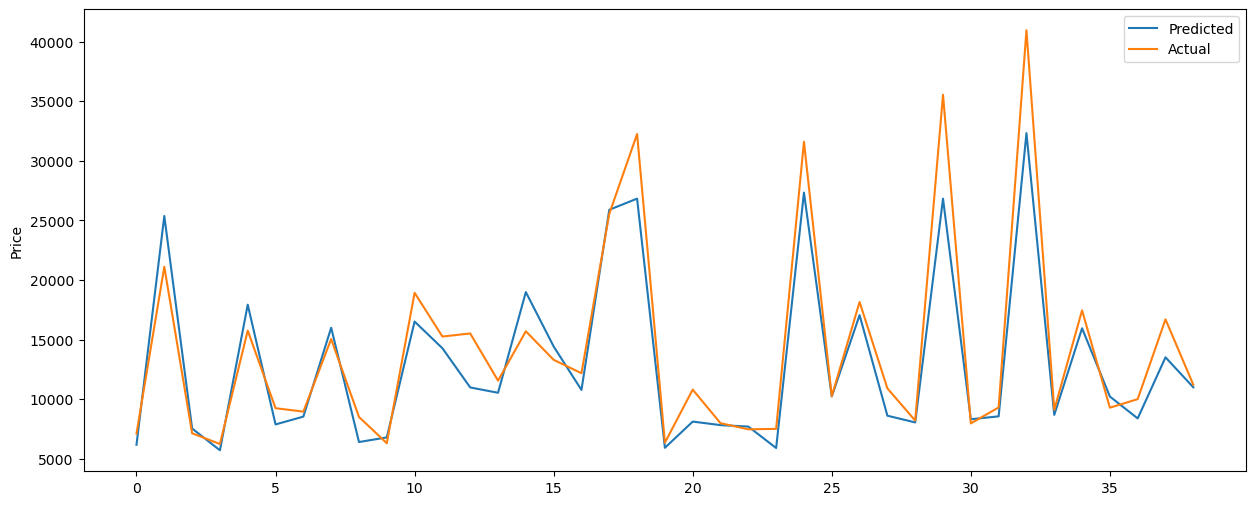

In [89]:
pylab.rcParams['figure.figsize'] = (15, 6)
plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('Price')

plt.legend()
plt.show()

In [62]:
r_square = ridge_model.score(x_test_scaled, y_test)
r_square

0.8141335626719121

In [63]:
ridge_model_mse = mean_squared_error(y_predict, y_test)
math.sqrt(ridge_model_mse)

3632.0248115617264

**Самостојна работа**: Извршете го кодот за Ridge регресискиот модел и споредете го со Lasso. Пробајте да ја промените вредноста на alpha да биде 0.5 (наместо 0.05) и обидете се сами да извлечете заклучоци. 
Дали добивте подобар модел со alpha=0.5 или alpha=0.05?
Но што ако alpha го поставите на 1.0, дали ќе добиете подобар модел?